## introduction
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns


# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 



In [2]:
df = pd.read_csv("C:/Users/الوعد للحاسبات/Downloads/SeoulBikeData.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(�C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(�C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### Dataset Description
There is:

8760 row

14 columns

Attribute Information:

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of he day

Temperature-Temperature in Celsius

Humidity - %

Windspeed - m/s

Visibility - 10m

Dew point temperature - Celsius

Solar radiation - MJ/m2

Rainfall - mm

Snowfall - cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)



In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Questions

### How do the temperatures change across the seasons? What are the mean and median temperatures?

### Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?

### Is there a difference between the real temperature and the feeled temperature? If there is a difference will it still be there across the different seasons?

### is temperature associated with bike rentals (registered vs. casual)?

### Can the number of total bike rentals be predicted by holiday and weather?

### What are the mean temperature, humidity, windspeed and total rentals per months?

What percentage of days are appropriate for biking concerning the weather with conditions

Temperature > 5°, weather situation 1-3, windspeed < 40 km/h and

Temperature > 10°, weather situation 1-2, windspeed < 20 km/h?




### Analyses
1. How do the temperatures change across the seasons? What are the mean and median temperatures?

In [5]:
# Define a function to map the values
def set_value(row_number, assigned_value):
    return assigned_value[row_number]
  


In [6]:
# Create the dictionary
event_dictionary ={'Winter' : 1, 'Summer' : 2, 'Spring' : 3, 'Autumn' : 4}
  
# Add a new column named 'Price'
df['S_No'] = df['Seasons'].apply(set_value, args =(event_dictionary, ))
  

In [7]:
df.sample(10)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,S_No
6073,11/08/2018,881,1,29.0,67,1.1,2000,22.2,0.00,0.0,0.0,Summer,No Holiday,Yes,2
7520,10/10/2018,2082,8,11.8,80,3.7,1518,8.4,0.16,0.0,0.0,Autumn,No Holiday,Yes,4
3071,07/04/2018,368,23,3.1,39,3.1,2000,-9.5,0.00,0.0,0.0,Spring,No Holiday,Yes,3
7621,14/10/2018,1593,13,18.1,32,1.5,1684,1.1,2.21,0.0,0.0,Autumn,No Holiday,Yes,4
3599,29/04/2018,820,23,15.2,51,1.0,858,5.1,0.00,0.0,0.0,Spring,No Holiday,Yes,3
1098,15/01/2018,555,18,5.2,44,1.3,647,-6.0,0.00,0.0,0.0,Winter,No Holiday,Yes,1
4002,16/05/2018,562,18,21.9,97,2.1,191,21.3,0.08,0.0,0.0,Spring,No Holiday,Yes,3
7991,29/10/2018,658,23,4.3,58,1.4,2000,-3.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,4
6861,12/09/2018,2012,21,23.2,57,1.1,2000,14.2,0.00,0.0,0.0,Autumn,No Holiday,Yes,4
6651,04/09/2018,223,3,20.6,97,0.2,500,20.1,0.00,0.0,0.0,Autumn,No Holiday,Yes,4


In [8]:
df.rename(columns = {'Temperature(�C)': 'Temp'}, inplace = True)

In [9]:
df

,Date,Rented Bike Count,Hour,Temp,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,S_No
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,4
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,4
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,4


In [10]:
W_mean = df[(df.Seasons == 'Winter')].Temp.mean()
A_mean = df[(df.Seasons == 'Autumn')].Temp.mean()
Sp_mean = df[(df.Seasons == 'Spring')].Temp.mean()
Sm_mean = df[(df.Seasons == 'Summer')].Temp.mean()

In [11]:
W_median = df[(df.Seasons == 'Winter')].Temp.median()
A_median = df[(df.Seasons == 'Autumn')].Temp.median()
Sp_median = df[(df.Seasons == 'Spring')].Temp.median()
Sm_median = df[(df.Seasons == 'Summer')].Temp.median()

In [12]:
W_std = df[(df.Seasons == 'Winter')].Temp.std()
A_std = df[(df.Seasons == 'Autumn')].Temp.std()
Sp_std = df[(df.Seasons == 'Spring')].Temp.std()
Sm_std = df[(df.Seasons == 'Summer')].Temp.std()

In [13]:
df.groupby('Seasons').Temp.mean()

Seasons
Autumn    14.120833
Spring    13.046694
Summer    26.582790
Winter    -2.540463
Name: Temp, dtype: float64

In [14]:
df.groupby('Seasons').Temp.median()


Seasons
Autumn    13.85
Spring    13.30
Summer    26.60
Winter    -2.20
Name: Temp, dtype: float64

In [15]:
df.groupby('Seasons').Temp.std()

Seasons
Autumn    7.062297
Spring    6.617154
Summer    4.662299
Winter    5.469763
Name: Temp, dtype: float64

In [16]:
All = df.groupby('Seasons').Temp.agg(['mean', 'std', 'median'])

,mean,std,median
Seasons,,,
Autumn,14.120833,7.062297,13.85
Spring,13.046694,6.617154,13.30
Summer,26.582790,4.662299,26.60
Winter,-2.540463,5.469763,-2.20


## Secondly we created a histogram displaying the temperatures of each season including lines for the mean and median temperatures.

## Is there a correlation between the temp/atemp/mean.temp.atemp and the total count of bike rentals?



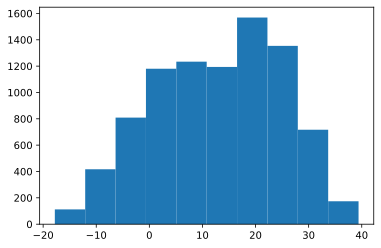

In [17]:
plt.hist(df.Temp);

In [ ]:
#sns.barplot(x = 'target',y='sepal length (cm)',data=data);